# Customer Segmentation Using Clustering 

## Importing modules

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration

In [4]:
df = pd.read_excel("Online Retail.xlsx") #importing the dataframe

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [4]:
df.head() #exploring the 1st 5 rows of the df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
print("Number of Columns in the Data: ", df.shape[1])
print("Number of Rows in the Data: ", df.shape[0])
df.shape #give the number of rows and columns

Number of Columns in the Data:  8
Number of Rows in the Data:  541909


(541909, 8)

In [6]:
df.info() #gives infos about the type of values and the number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum() #the total number of null values for each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.duplicated().sum() #the total number of duplicated rows

5268

## Exploratory Data Analysis - EDA

In [10]:
des = df.describe().transpose() #usefull statistics about the df
des

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [11]:
country_count = df.Country.value_counts() #giving the countries and their count
country_count

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


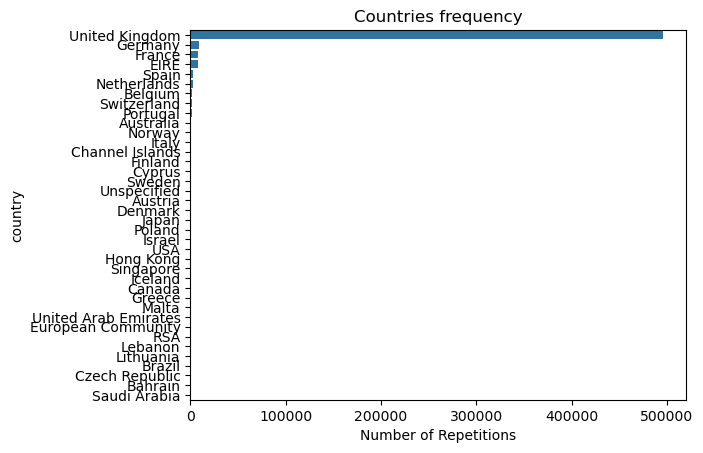

In [12]:
sns.barplot(x=country_count.values, y=country_count.index)
plt.title("Countries frequency" )
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

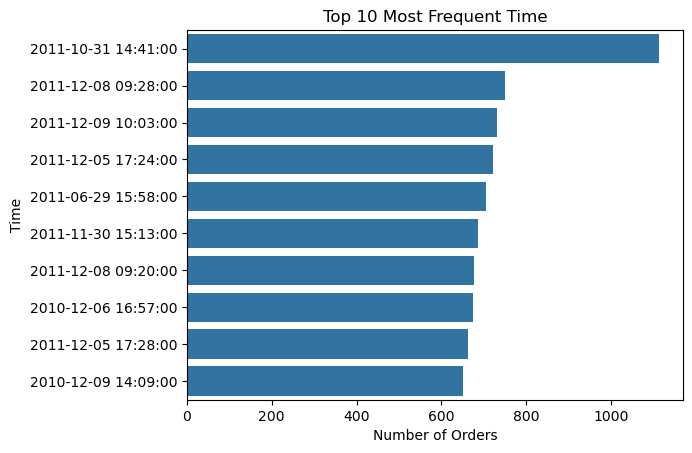

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d.%f')
time_trend = df['InvoiceDate'].value_counts().head(10)

sns.barplot(x=time_trend.values, y=time_trend.index)
plt.title('Top 10 Most Frequent Time')
plt.xlabel('Number of Orders')
plt.ylabel('Time')
plt.show()

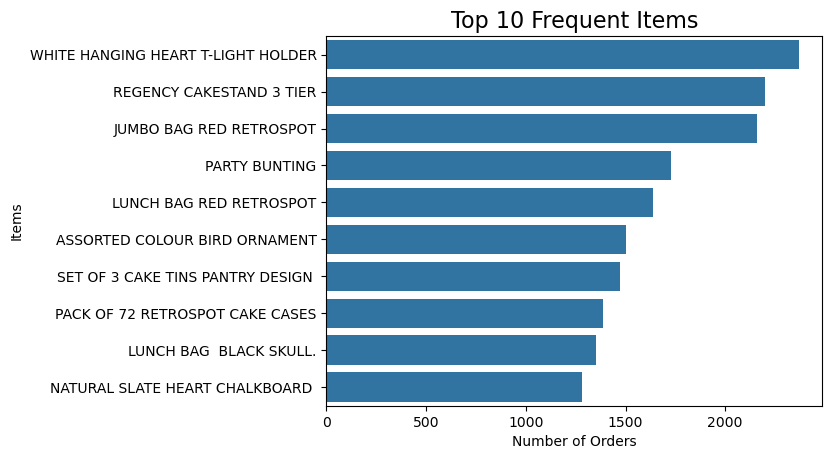

In [14]:
description_count = df["Description"].value_counts().head(10)

sns.barplot(x=description_count.values, y=description_count.index)
plt.title("Top 10 Frequent Items", fontsize=16)
plt.xlabel("Number of Orders")
plt.ylabel("Items")
plt.show()

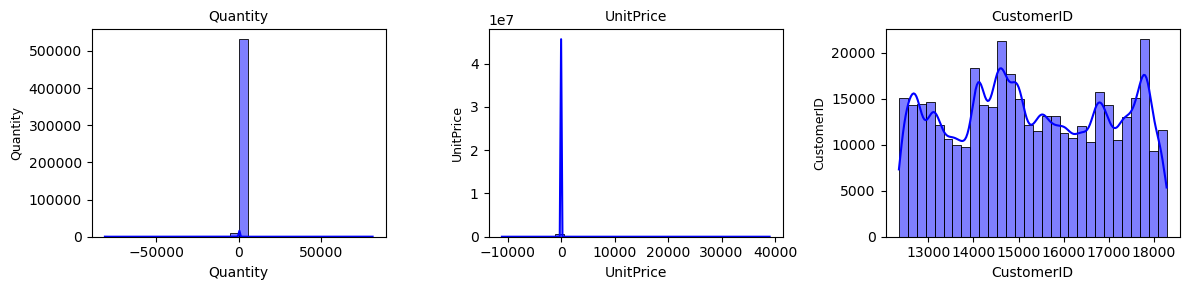

In [16]:
numerical_columns = df.select_dtypes(include="number").columns # Select only numerical columns from the DataFrame
num_features = len(numerical_columns) # Determine the number of features (numerical columns)
# Set up a flexible subplot grid (rows and columns) (dynamically)
num_cols = 3 
num_rows = int(np.ceil(num_features / num_cols)) 

plt.figure(figsize=(num_cols * 4, num_rows * 3))# Create the figure with the calculated grid size
# Loop through each numerical feature and create a histogram
for i, feature in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # subplot position
    sns.histplot(data=df, x=df[feature], bins=30, kde=True, color='blue') #histogram with KDE =True (Kernel Density Estimation) curve
    plt.title(f'{feature}', fontsize=10)
    plt.ylabel(feature, fontsize=9)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show() 

In [17]:
df.drop_duplicates(inplace=True)#removing duplicated rows

In [18]:
df.dropna(inplace=True)# Removing missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# This code removes outliers from the "Quantity" and "UnitPrice" columns of a DataFrame (df) 
# using the Interquartile Range (IQR) method. The IQR method identifies outliers by calculating 
# the first quartile (Q1) and third quartile (Q3) and setting upper and lower limits as:
# Upper Limit = Q3 + 1.5 * IQR
# Lower Limit = Q1 - 1.5 * IQR
# Any data points outside these limits are considered outliers and are removed.
# The process is applied separately to "Quantity" and "UnitPrice".
q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1
 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]
q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]


## Encoding

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [36]:
X = df[["Quantity", "UnitPrice", "Country"]].copy() #sleceting columns and creating a copy to avoid unintended modifications to the original df

# Initialize the LabelEncoder, which converts categorical values into numerical labels. 
# Apply Label Encoding to the "Country" column, this replaces each unique country name with a corresponding integer.

encoder = LabelEncoder()
X["Country"] = encoder.fit_transform(X["Country"])


## Feature Engineering 

In [39]:
X["total_price"] = X["Quantity"] * X["UnitPrice"]
X

,Quantity,UnitPrice,Country,total_price
0,6,2.55,35,15.30
1,6,3.39,35,20.34
2,8,2.75,35,22.00
3,6,3.39,35,20.34
4,6,3.39,35,20.34
...,...,...,...,...
541904,12,0.85,13,10.20
541905,6,2.10,13,12.60
541906,4,4.15,13,16.60
541907,4,4.15,13,16.60


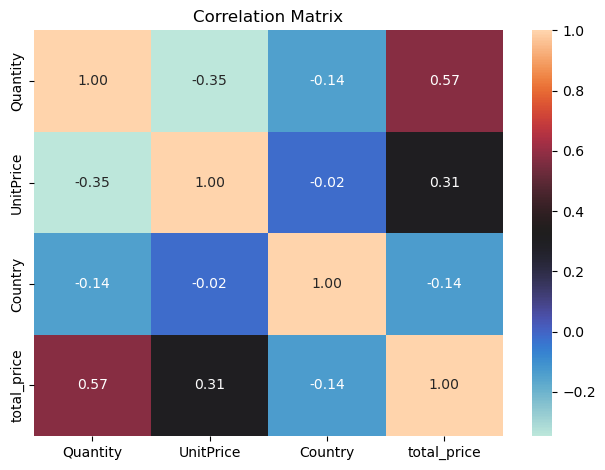

In [41]:
corr = X.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire")# fmt formats the displayed values to 2 decimal places
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [43]:
scaler = StandardScaler()  # Initialize a StandardScaler
X = scaler.fit_transform(X)  # Apply standardization to X


## Machine Learning - Clustering 

In [46]:
# List to store the Within-Cluster Sum of Squares (WCSS) for different cluster counts
wcss = []

for i in range(2, 11):  
    # Initialize K-Means with 'i' clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=i, random_state=20)  
    
    # Fit K-Means to the data
    kmeans.fit(X)  
    
    # Append the inertia (WCSS) to the list
    wcss.append(kmeans.inertia_) 

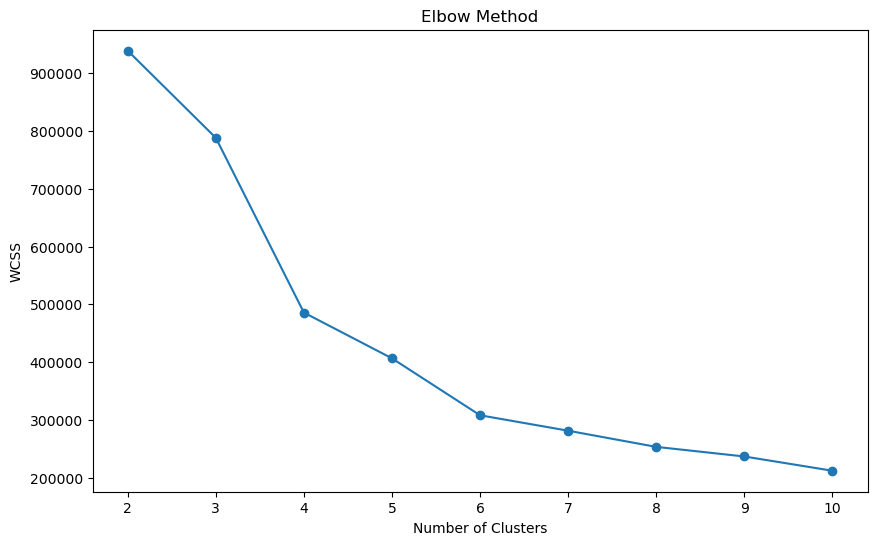

In [47]:
# Visualizing the Elbow Method to determine the optimal number of clusters for K-Means.
# The Within-Cluster Sum of Squares (WCSS) is plotted against different cluster numbers (from 2 to 10).
# A sharp "elbow" in the plot indicates the optimal number of clusters, where adding more clusters does not significantly reduce WCSS.

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
# Applying K-Means clustering to the dataset.
# This initializes a K-Means model with 5 clusters and a fixed random state for reproducibility.
# The model is trained on the feature matrix X, and each data point is assigned to a cluster.
# The assigned cluster labels are stored in a new column 'Cluster' in the DataFrame (df).
kmeans = KMeans(n_clusters=6, random_state=20)  
df['Cluster'] = kmeans.fit_predict(X)  

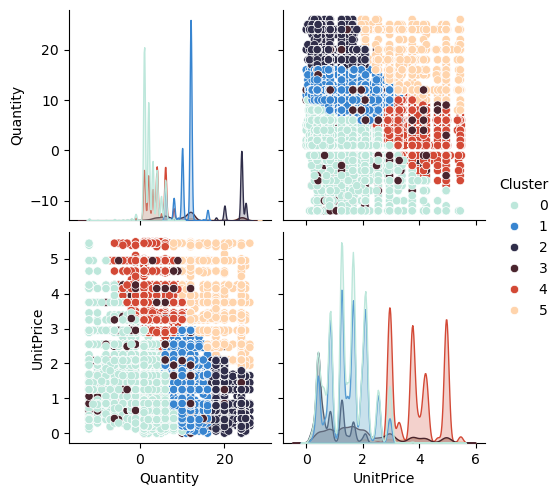

In [72]:
# Creating a pairplot to visualize the distribution and relationships between selected features.
sns.pairplot(df, hue='Cluster', vars=['Quantity', 'UnitPrice'], palette='icefire')
plt.show()

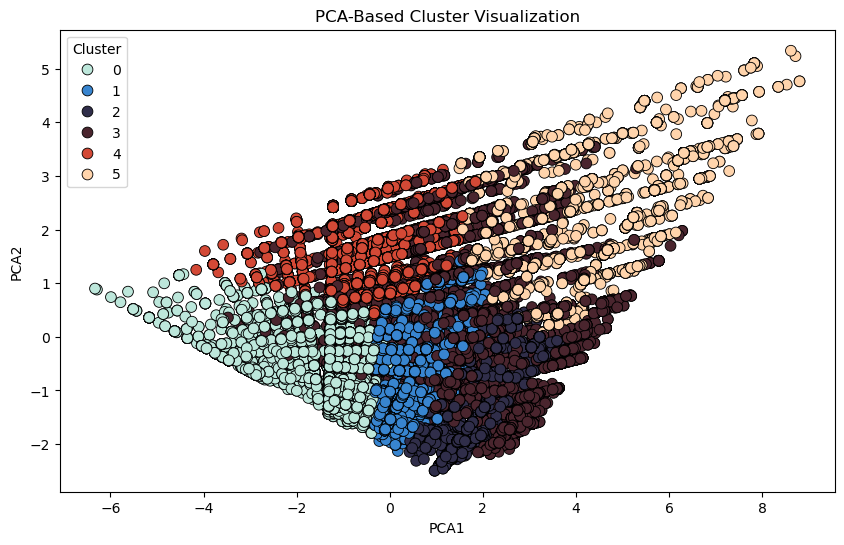

In [73]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Scatterplot with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='icefire', s=60, edgecolor='k')
plt.title("PCA-Based Cluster Visualization")
plt.show()


In [ ]:
print("=== K-MEANS EVALUATION ===")

kmeans_silhouette = silhouette_score(X, df["Cluster"])

print(f"Silhouette Score: {kmeans_silhouette}")

=== K-MEANS EVALUATION ===
Silhouette Score: 0.4473547148657223
